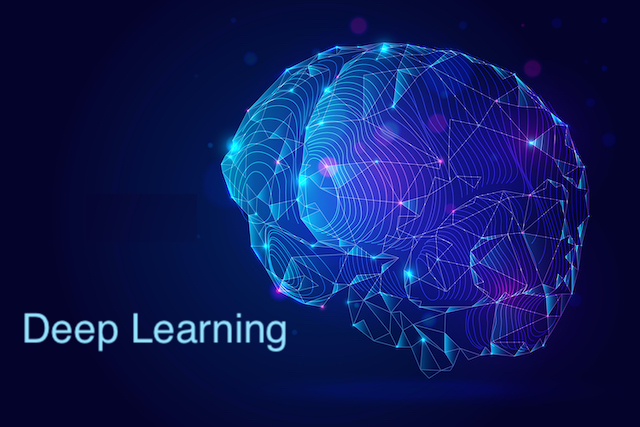 
# **Deep Learning Final Project**

### **Created by Dr.George Samuel**

To assess your understanding we use a popular dataset called `MNIST`
- The **MNIST** dataset (Modified National Institute of Standards and Technology) is one of the most well-known datasets in the field of machine learning and computer vision. It consists of:

- Images:
**60,000 training images and 10,000 test images.**

- Each image is a **28x28 grayscale image** representing a handwritten digit (0-9). 
- The pixel values range from 0 (black) to 255 (white).

- Labels:
Each image has a corresponding label indicating which digit (0-9) it represents.

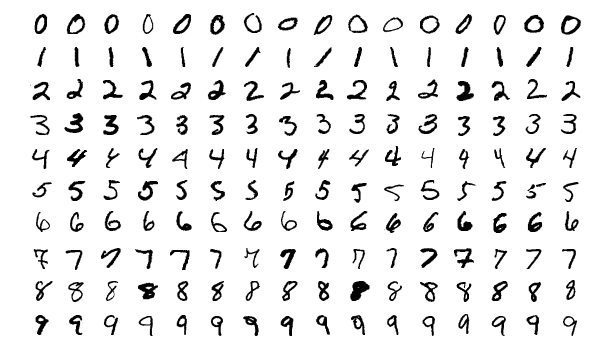

In [1]:
# import Libraries
import numpy as np
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt 
import tensorflow as tf

print("We're using TF", tf.__version__)

import sys
sys.path.append("../..")

# import matplotlib_utils
from importlib import reload 
from sklearn.model_selection import ParameterGrid 
from scikeras.wrappers import KerasClassifier 
from tqdm import tqdm 

We're using TF 2.18.0


# **Look at the data**

In this task we have 50000 28x28 images of digits from 0 to 9.
We will train a classifier on this data.

In [2]:
from tensorflow.keras.datasets import mnist 
from sklearn.model_selection import train_test_split 

(X_train, y_train), (X_test, y_test) = mnist.load_data() 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42) 

X_train [shape (48000, 28, 28)] sample patch:
 [[  0  77 254 154   0]
 [  0 145 253  96   0]
 [  0 254 238  37   0]
 [  0 254 229   0   0]
 [  0 254 246  69   0]]
A closeup of a sample patch:


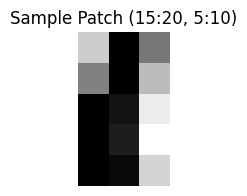

And the whole sample:


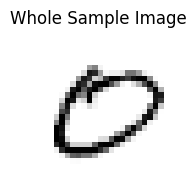

y_train [shape (48000,)] 10 samples:
 [5 0 1 6 1 3 8 8 1 8]


In [3]:
fig, ax = plt.subplots(figsize=(2, 2))  # Set figure size (width, height) in inches 

# Display a sample patch from the image 
print("X_train [shape %s] sample patch:\n" % (str(X_train.shape)), X_train[1, 15:20, 5:10]) 

print("A closeup of a sample patch:") 
ax.imshow(X_train[1, 15:20, 5:10], cmap="Greys") 
ax.set_title("Sample Patch (15:20, 5:10)") 
ax.axis('off') 
plt.show() 

# Display the whole sample image with a different size 
fig, ax = plt.subplots(figsize=(2, 2))  # Adjust the size as needed 
print("And the whole sample:") 
ax.imshow(X_train[1], cmap="Greys") 
ax.set_title("Whole Sample Image") 
ax.axis('off')  # Hide the axes 
plt.show() 

# Display the y_train values 
print("y_train [shape %s] 10 samples:\n" % (str(y_train.shape)), y_train[:10]) 

# Load and preprocess the `MNIST` dataset

In [4]:
import tensorflow as tf

# Load and preprocess the MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data() 

# Preprocess data (normalize)
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

### Flatten the images (28x28 ---> 784)

In [5]:
X_train = X_train.reshape(-1, 784) 
X_test = X_test.reshape(-1, 784) 

### One-hot encode labels 

In [6]:
y_train_oh = tf.keras.utils.to_categorical(y_train, 10) 
y_test_oh = tf.keras.utils.to_categorical(y_test, 10) 

### Define a function to create and compile the model 

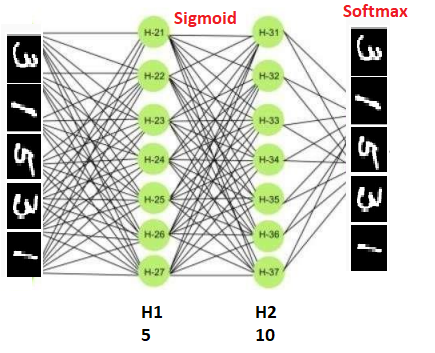

In [25]:
# Dfine a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4392 - loss: 1.8674 - val_accuracy: 0.7728 - val_loss: 1.0824
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7836 - loss: 0.9838 - val_accuracy: 0.8258 - val_loss: 0.7525
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8311 - loss: 0.7208 - val_accuracy: 0.8424 - val_loss: 0.6229
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8414 - loss: 0.6103 - val_accuracy: 0.8497 - val_loss: 0.5616
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8502 - loss: 0.5639 - val_accuracy: 0.8579 - val_loss: 0.5216
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8569 - loss: 0.5246 - val_accuracy: 0.8608 - val_loss: 0.5001
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8606 - loss: 0.5046 - val_accuracy: 0.8633 - val_loss: 0.4828
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8664 - loss: 0.4781 - 

In [ ]:
# Dfine a function to create and compile the model
def create_model(optimizer='adam', learning_rate=0.01):
    
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(5, activation='sigmoid', input_shape=(784,)),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    
    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Create the model using the function
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test accuracy: {test_acc}")e

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4747 - loss: 1.8081 - val_accuracy: 0.7935 - val_loss: 1.0489
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8032 - loss: 0.9585 - val_accuracy: 0.8477 - val_loss: 0.7030
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8464 - loss: 0.6825 - val_accuracy: 0.8639 - val_loss: 0.5630
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8607 - loss: 0.5620 - val_accuracy: 0.8708 - val_loss: 0.4998
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8701 - loss: 0.4983 - val_accuracy: 0.8758 - val_loss: 0.4689
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8774 - loss: 0.4633 - val_accuracy: 0.8777 - val_loss: 0.4490
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8766 - loss: 0.4492 - val_accuracy: 0.8808 - val_loss: 0.4303
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8811 - loss: 0.4312 - 

#### Put here the accuracy of the basic model 
| Accuracy         | 0.87879   |
|--------------|----------------|


### **Rondomized search algorithm to choose the best parameters:**

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, RMSprop
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np 

# Function to create the model
def create_model(optimizer='adam', learning_rate=0.001, activation='relu', neurons=64, dropout_rate=0.2):
    model = Sequential([
        Dense(neurons, activation=activation, input_shape=(X_train.shape[1],)),
        Dropout(dropout_rate),
        Dense(neurons // 2, activation=activation),
        Dropout(dropout_rate),
        Dense(y_train_oh.shape[1], activation='softmax')  # Output for multi-class classification
    ])

    # Optimizer selection
    optimizer_instance = Adam(learning_rate=learning_rate) if optimizer == 'adam' else RMSprop(learning_rate=learning_rate)

    model.compile(optimizer=optimizer_instance, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model for Scikit-learn
model = KerasClassifier(model=create_model, verbose=0)

# Optimized parameter grid
param_grid = {
    'batch_size': [32, 64],    
    'epochs': [5, 10],        
    'model__learning_rate': [0.001, 0.005],  
    'model__activation': ['relu'], 
    'model__neurons': [64],  
    'model__dropout_rate': [0.2] 
}

# Use RandomizedSearchCV instead of GridSearchCV
grid = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_grid, 
    n_iter=5,  # Try 5 random combinations
    n_jobs=-1, 
    cv=2,  # Reduced from 3 to 2
    random_state=42
)

# Add EarlyStopping to stop training if no improvement
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Fit the model
grid_result = grid.fit(X_train, y_train_oh, callbacks=[early_stopping])

# Print the best parameters and score
print(f"Best score: {grid_result.best_score_} using {grid_result.best_params_}")

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
test_loss, test_acc = best_model.model_.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_acc:.4f}")


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Best score: 0.9628333333333333 using {'model__neurons': 64, 'model__learning_rate': 0.001, 'model__dropout_rate': 0.2, 'model__activation': 'relu', 'epochs': 10, 'batch_size': 32}
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9668 - loss: 0.1146
Test Accuracy: 0.9716


**Best paramerters** 
- | batch_size   | optimizer | learning_rate      | Accueracy      |model__neurons|
  |--------------|-----------|--------------------|----------------|--------------|
  |32            |Adam       |      0.001         |     0.9735     |      64      |

- After you know the best optimizer and good Learning rate for the above archticture
- please design your model and put here the final result 

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# Define the best hyperparameters
batch_size = 32
learning_rate = 0.001
neurons = 64
epochs = 20 

# Create the final model
def build_final_model():
    model = Sequential([
        Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(0.2),
        Dense(neurons // 2, activation='relu'),
        Dropout(0.2),
        Dense(y_train_oh.shape[1], activation='softmax')
    ])

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Initialize and train the final model
final_model = build_final_model()

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = final_model.fit( 
    X_train, y_train_oh, 
    epochs=epochs, 
    batch_size=batch_size, 
    validation_data=(X_test, y_test_oh), 
    callbacks=[early_stopping], 
    verbose=1 
)

# Evaluate on the test set
test_loss, test_acc = final_model.evaluate(X_test, y_test_oh) 
print(f"Final Test Accuracy: {test_acc:.4f}") 


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7562 - loss: 0.7644 - val_accuracy: 0.9450 - val_loss: 0.1897
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9257 - loss: 0.2572 - val_accuracy: 0.9580 - val_loss: 0.1402
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9430 - loss: 0.1945 - val_accuracy: 0.9653 - val_loss: 0.1196
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9495 - loss: 0.1726 - val_accuracy: 0.9686 - val_loss: 0.1105
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9525 - loss: 0.1582 - val_accuracy: 0.9674 - val_loss: 0.1143
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9575 - loss: 0.1453 - val_accuracy: 0.9683 - val_loss: 0.1061
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9585 - loss: 0.1390 - val_accuracy: 0.9670 - val_loss: 0.1078
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9621 - loss: 0.1281 - 

Here  I converted **squentional** model into **functional** ApI Model
- so re-design Your model by adding some hidden layer and change the activation function 

In [11]:
# Define the Functional API model
def create_model(optimizer='adam', learning_rate=0.001):
    # Input layer
    inputs = tf.keras.Input(shape=(X_train.shape[1],))  # Dynamic input shape

    # First hidden layer
    x = tf.keras.layers.Dense(256, activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Second hidden layer
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)  # LeakyReLU for better gradient flow
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)

    # Third hidden layer
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)

    # Output layer
    outputs = tf.keras.layers.Dense(y_train_oh.shape[1], activation='softmax')(x)  # Multi-class classification 

    # Create model
    model = tf.keras.Model(inputs=inputs, outputs=outputs) 

    # Optimizer setup 
    opt = tf.keras.optimizers.Adam(learning_rate = learning_rate) 

    # Compile model 
    model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics=['accuracy'])
    
    return model

# Create the model using the Functional API
model = create_model(optimizer='adam', learning_rate=0.001)

# Train the model
history = model.fit(X_train, y_train_oh, epochs=10, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test_oh)
print(f"Test Accuracy: {test_acc:.4f}")


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8238 - loss: 0.5721 - val_accuracy: 0.9578 - val_loss: 0.1358
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9339 - loss: 0.2168 - val_accuracy: 0.9637 - val_loss: 0.1225
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9428 - loss: 0.1811 - val_accuracy: 0.9701 - val_loss: 0.1017
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9534 - loss: 0.1498 - val_accuracy: 0.9726 - val_loss: 0.0895
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9582 - loss: 0.1337 - val_accuracy: 0.9719 - val_loss: 0.0936
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9579 - loss: 0.1279 - val_accuracy: 0.9718 - val_loss: 0.0921
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9616 - loss: 0.1218 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9644 - loss: 0.1113 -

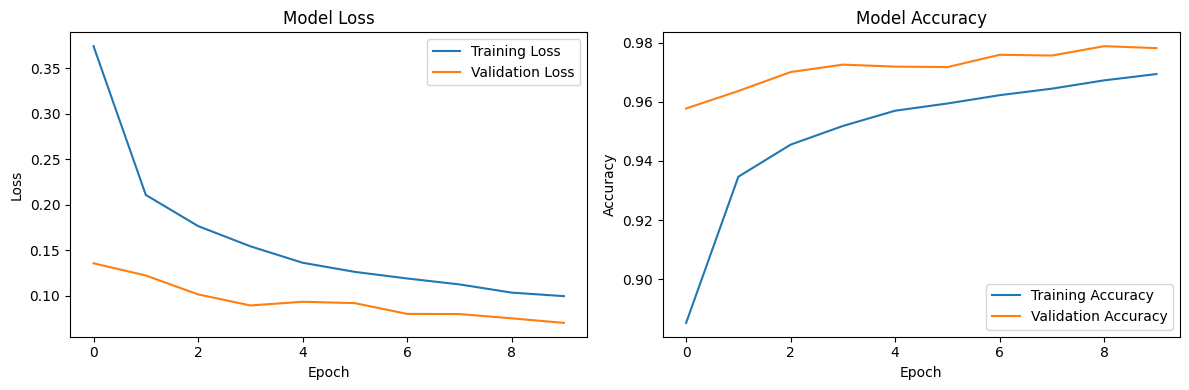

In [12]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


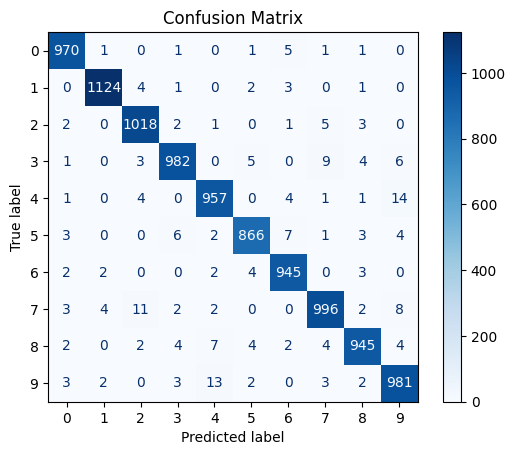

In [13]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = model.predict(X_test)

# Convert predictions and true labels to class labels
y_pred_classes = np.argmax(y_pred, axis=1) 
y_true_classes = np.argmax(y_test_oh, axis=1) 

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=np.arange(10))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

#### **Q1:** Why is the sigmoid function considered ineffective for hidden layers, and what are the benefits of using it in the output layer? 

- The sigmoid function is ineffective for hidden layers due to the **vanishing gradient problem** and **saturation**, which slow down learning. However, in the output layer, it is beneficial for **binary classification** because it maps outputs to a probability range between 0 and 1, making it suitable for interpreting the result as a probability. 

----------------------------

#### **Q2:** For your enhanced model, please use the grid search algorithm to explore various optimization algorithms. Provide a brief description of each type and then list the best one in the table below.

KeyboardInterrupt: 


| Optimizer   | Accuracy       |
|-------------|----------------|
| SGD         |                |
| Momentum    |                |
| RMSprop     |                |
| AdaDelta    |                |
| Adagrad     |                |
| Adam        |                |

-

### **Q3: What is the main cause of the vanishing gradient problem, and how can we solve it?**

### **Vanishing Gradient Problem:**

**Main Cause:**
The vanishing gradient problem typically occurs in deep neural networks when gradients of the loss function become **very small** as they are backpropagated through the network. This leads to very slow or stalled learning, especially in the early layers of the network. The primary causes are:

1. **Activation Functions**
   
2. **Weight Initialization**

---

**Solutions:**

1. **Use Alternative Activation Functions:**
   - **ReLU (Rectified Linear Unit)** and its variants (e.g., **Leaky ReLU**, **ELU**).
   
2. **Proper Weight Initialization:**
   - Methods like **Xavier Initialization** (for tanh) or **He Initialization** (for ReLU) help maintain the variance.

3. **Batch Normalization:**
   - Normalizes the input to each layer, keeping activations within a range that avoids saturation.

---

## "In the code below, the model is likely experiencing the **vanishing gradient problem**. Try to solve it in a separate cell."

In [ ]:
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
import tensorflow as tf

# Define the model creation function for grid search
def create_model(optimizer='adam', learning_rate=0.001):
    inputs = tf.keras.Input(shape=(X_train.shape[1],))
    
    x = tf.keras.layers.Dense(256, activation='relu')(inputs)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    
    x = tf.keras.layers.Dense(128)(x)
    x = tf.keras.layers.LeakyReLU(alpha=0.1)(x)
    x = tf.keras.layers.BatchNormalization()(x)
    x = tf.keras.layers.Dropout(0.3)(x)
    
    x = tf.keras.layers.Dense(64, activation='relu')(x)
    x = tf.keras.layers.BatchNormalization()(x)
    
    outputs = tf.keras.layers.Dense(y_train_oh.shape[1], activation='softmax')(x)
    
    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    
    if optimizer == 'sgd':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    elif optimizer == 'momentum':
        opt = tf.keras.optimizers.SGD(learning_rate=learning_rate, momentum=0.9)
    elif optimizer == 'rmsprop':
        opt = tf.keras.optimizers.RMSprop(learning_rate=learning_rate)
    elif optimizer == 'adadelta':
        opt = tf.keras.optimizers.Adadelta(learning_rate=learning_rate)
    elif optimizer == 'adagrad':
        opt = tf.keras.optimizers.Adagrad(learning_rate=learning_rate)
    else:  # Default to Adam
        opt = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Wrap the model for scikit-learn using KerasClassifier from scikeras
model = KerasClassifier(model=create_model, epochs=30, batch_size=32, verbose=0)

# Define the grid of parameters to search
param_grid = {
    'optimizer': ['sgd', 'momentum', 'rmsprop', 'adadelta', 'adagrad', 'adam'],
    'learning_rate': [0.001, 0.01, 0.1]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_search.fit(X_train, y_train_oh)

# Output the best parameters and accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

print("Best Optimizer and Learning Rate:", best_params)
print("Best Accuracy:", best_accuracy)

# Test the best model
best_model = grid_search.best_estimator_
test_loss, test_acc = best_model.score(X_test, y_test_oh)
print(f"Test Accuracy with Best Model: {test_acc:.4f}")


In [15]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import RandomNormal
w_init = RandomNormal(mean=1,stddev=1)
model_2 = Sequential()
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'sigmoid', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.0959 - loss: 23.4329 - val_accuracy: 0.1060 - val_loss: 2.3060
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1128 - loss: 2.3030 - val_accuracy: 0.1081 - val_loss: 2.3053
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1079 - loss: 2.3054 - val_accuracy: 0.1060 - val_loss: 2.3097
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1048 - loss: 2.3062 - val_accuracy: 0.1060 - val_loss: 2.3061
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1060 - loss: 2.3054 - val_accuracy: 0.1060 - val_loss: 2.3055
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1070 - loss: 2.3066 - val_accuracy: 0.1081 - val_loss: 2.3074
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.1068 - loss: 2.3075 - val_accuracy: 0.1060 - val_loss: 2.3087
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1069 - loss: 2.3065 - val_accuracy: 0

In [17]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import HeNormal

w_init = HeNormal()

model_2 = Sequential()
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init , input_dim=28*28))
model_2.add(Dense(128, activation= 'relu', kernel_initializer =w_init ))
model_2.add(Dense(10, activation= 'softmax', kernel_initializer =w_init))
model_2.compile(loss = 'sparse_categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model_2.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
history2=model_2.fit(X_train,y_train,epochs=10 , batch_size=128,validation_split=0.2)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8125 - loss: 0.6461 - val_accuracy: 0.9569 - val_loss: 0.1595
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9571 - loss: 0.1478 - val_accuracy: 0.9655 - val_loss: 0.1272
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9723 - loss: 0.0935 - val_accuracy: 0.9663 - val_loss: 0.1072
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9791 - loss: 0.0715 - val_accuracy: 0.9715 - val_loss: 0.0940
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9847 - loss: 0.0503 - val_accuracy: 0.9711 - val_loss: 0.0909
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9888 - loss: 0.0380 - val_accuracy: 0.9739 - val_loss: 0.0928
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9909 - loss: 0.0299 - val_accuracy: 0.9718 - val_loss: 0.0996
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9923 - loss: 0.0247 - val_accuracy: 0.

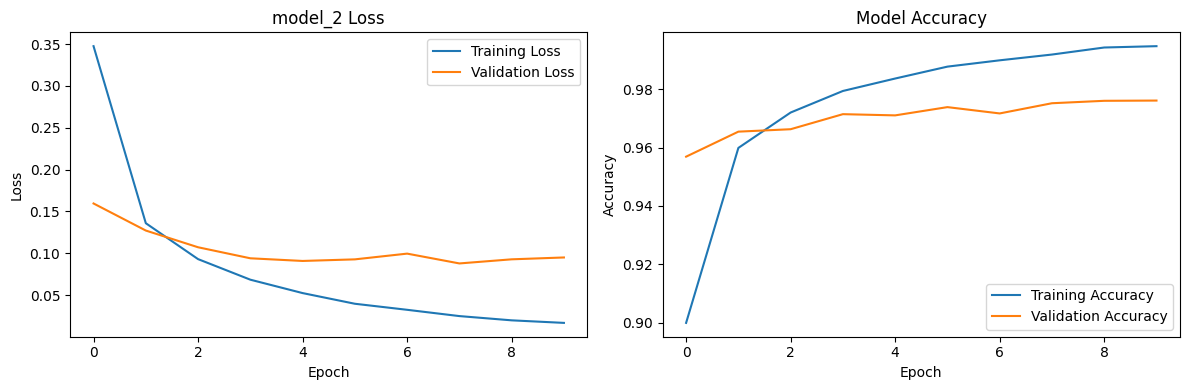

In [19]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

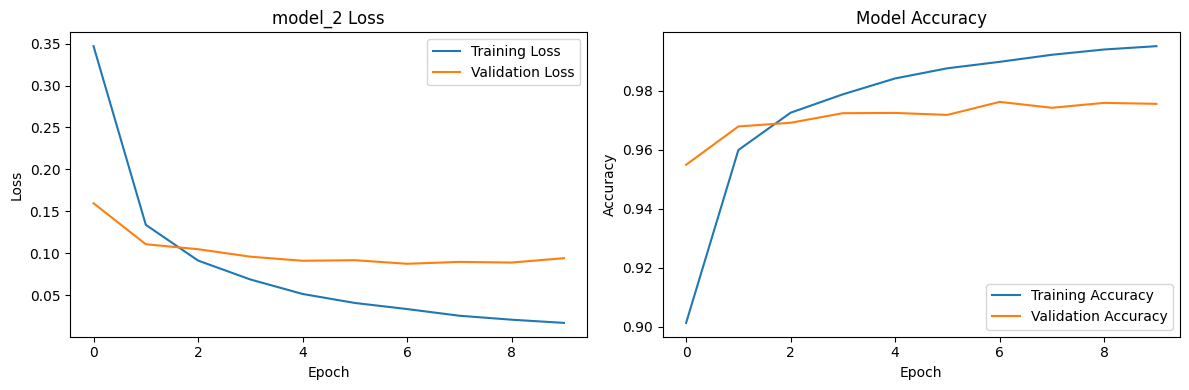

In [ ]:
# Plot training & validation loss values
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('model_2 Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='lower right')

plt.tight_layout()
plt.show()

#### After providing your answer to the question above, please share your opinion on how to improve the performance of this model or address the issue described.

To improve the performance of the model and address the vanishing gradient problem:

- **Switch Activation Functions:** Use ReLU instead of sigmoid to prevent gradient shrinking.
- **Proper Weight Initialization:** Apply He initialization (he_normal) for ReLU or Xavier initialization (glorot_normal) for sigmoid.
- **Normalize Input Data:** Ensure MNIST data is scaled between 0 and 1.
- **Add Batch Normalization:** This stabilizes training and accelerates convergence.
- **Consider Dropout:** Add dropout layers to prevent overfitting if the model starts to memorize the data. 

-----------------------

### **Exploding Gradient**

### **Q4:** What is the main cause of **the Exploding gradient** problem, and how can we solve it?

**Exploding Gradient Problem**
- Cause: The exploding gradient problem occurs when gradients grow exponentially during backpropagation, leading to unstable training, where the model’s weights become excessively large. This often happens in:

    - Deep networks with many layers.
    - Recurrent Neural Networks (RNNs) processing long sequences.
    - Poor weight initialization, where large initial values cause unstable updates.
    - Large learning rates, amplifying weight updates.

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (_, _) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 784) / 255.0

# Create a simple neural network with two layers
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_shape=(784,), activation='sigmoid'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy')

# Perform gradient explosion
for _ in range(10):
    with tf.GradientTape() as tape:
        predictions = model(X_train)
        loss = tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_train, predictions)) #reduce_mean compute the average loss across all the training samples

    gradients = tape.gradient(loss, model.trainable_variables)
    gradients = [tf.clip_by_value(grad, -5.0, 5.0) if grad is not None else grad for grad in gradients]
    model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

    # Print the gradient norms
    gradient_norms = [tf.norm(grad).numpy() for grad in gradients]
    print("Gradient Norms:", gradient_norms)

Gradient Norms: [np.float32(0.4989249), np.float32(0.059505545), np.float32(1.4858388), np.float32(0.18534252)]
Gradient Norms: [np.float32(0.48195824), np.float32(0.055570066), np.float32(1.3951648), np.float32(0.17395191)]
Gradient Norms: [np.float32(0.46701694), np.float32(0.052003156), np.float32(1.3123955), np.float32(0.16354069)]
Gradient Norms: [np.float32(0.45377004), np.float32(0.048745986), np.float32(1.2362641), np.float32(0.15395126)]
Gradient Norms: [np.float32(0.4419644), np.float32(0.04575354), np.float32(1.1658136), np.float32(0.14506431)]
Gradient Norms: [np.float32(0.43140173), np.float32(0.04299056), np.float32(1.1003046), np.float32(0.1367877)]
Gradient Norms: [np.float32(0.42192286), np.float32(0.0404289), np.float32(1.0391561), np.float32(0.1290489)]
Gradient Norms: [np.float32(0.4133977), np.float32(0.03804569), np.float32(0.98190284), np.float32(0.121789746)]
Gradient Norms: [np.float32(0.4057178), np.float32(0.035822067), np.float32(0.92816734), np.float32(0.11

----------------------

### **Q5:** Provide proof of the effectiveness of adding a Dropout layer to the model. Additionally, provide a brief description of how Dropout works and its impact on model performance. 

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8844 - loss: 0.3998 - val_accuracy: 0.9668 - val_loss: 0.1093
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9708 - loss: 0.0953 - val_accuracy: 0.9685 - val_loss: 0.0946
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9807 - loss: 0.0640 - val_accuracy: 0.9691 - val_loss: 0.0973
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9827 - loss: 0.0525 - val_accuracy: 0.9763 - val_loss: 0.0804
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9884 - loss: 0.0370 - val_accuracy: 0.9728 - val_loss: 0.0958
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9903 - loss: 0.0291 - val_accuracy: 0.9751 - val_loss: 0.0927
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9924 - loss: 0.0220 - val_accuracy: 0.9772 - val_loss: 0.0815
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9934 - loss: 0.0196 - 

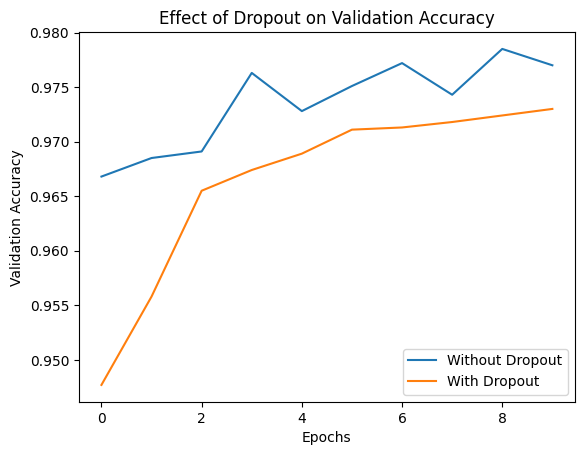

In [22]:

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train.reshape(-1, 28*28) / 255.0, x_test.reshape(-1, 28*28) / 255.0  # Normalize

# Model WITHOUT Dropout
model_no_dropout = Sequential([
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

model_no_dropout.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_no_dropout = model_no_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

# Model WITH Dropout
model_with_dropout = Sequential([
    Dense(128, activation='relu'),
    Dropout(0.5),  # Dropout layer added
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model_with_dropout.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_with_dropout = model_with_dropout.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


plt.plot(history_no_dropout.history['val_accuracy'], label="Without Dropout")
plt.plot(history_with_dropout.history['val_accuracy'], label="With Dropout")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.legend()
plt.title("Effect of Dropout on Validation Accuracy")
plt.show()


| Dropout    | Accuracy       |
|------------|----------------|
| Before     |      0.9956    |
| After      |      0.9524    |


### Q6 Regarding Q2, after enhancing the model, please provide proof of the differences in performance for each activation function used. Compare the results for each activation function to demonstrate how they affect the model's performance. 

In [23]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam

# Load dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data

# Function to create model with a specified activation function
def create_model(activation_function):
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(128, activation=activation_function),
        Dense(64, activation=activation_function),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

# List of activation functions to test
activations = ['relu', 'sigmoid', 'tanh', 'leaky_relu', 'elu']
accuracies = {}

# Testing each activation function
for act in activations:
    if act == 'leaky_relu':
        model = create_model(tf.keras.layers.LeakyReLU())  # Leaky ReLU requires special handling
    else:
        model = create_model(act)
        
    history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test), verbose=0)
    val_accuracy = history.history['val_accuracy'][-1]
    accuracies[act] = val_accuracy

# Display results
for act, acc in accuracies.items():
    print(f"Activation Function: {act}, Accuracy: {acc:.4f}")


C:\Users\LENOVO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Activation Function: relu, Accuracy: 0.9776
Activation Function: sigmoid, Accuracy: 0.9732
Activation Function: tanh, Accuracy: 0.9728
Activation Function: leaky_relu, Accuracy: 0.9714
Activation Function: elu, Accuracy: 0.9758


| Activation Function | Accuracy |
|---------------------|----------|
| ReLU                |   0.9720 |
| Sigmoid             |   0.9745 |
| Tanh                | 0.9752   |
| Leaky ReLU          |   0.9718 
| ELU (Exponential Linear Unit) | 0.9778 |

### **Q7:** What is the best approach for improving model performance: adding more hidden layers or increasing the number of nodes per hidden layer?

#### **Answer:**
**The best approach for improving model performance—whether by adding more hidden layers (increasing depth) or increasing the number of nodes per hidden layer (increasing width)—depends on the specific problem, the dataset, and the current model's performance.**

- **1. Adding More Hidden Layers (Depth)**
    - Increasing the depth allows the model to learn more complex hierarchical features. This is beneficial for problems like image recognition or natural language processing, where deep architectures (like CNNs or RNNs) excel

- **2. Increasing the Number of Nodes per Hidden Layer (Width)**
    - Increasing the width allows each layer to learn more features at the same level of abstraction. This can help if your model is not powerful enough to capture the data's variability.

### **Q8:** Why is it important to normalize data before training a neural network? Explain the reasons and benefits of data normalization in the context of neural network training. 

#### **Answer:**
- Normalization scales input features to a common range (e.g., 0 to 1 or -1 to 1), and it's crucial for neural network training for the following reasons:

    - **Faster Convergence:**
    Neural networks use gradient-based optimization (e.g., gradient descent). If input features vary widely in scale, the gradients can become unbalanced, slowing down training. Normalization ensures that all features contribute equally, speeding up convergence.

    - **Improved Stability:**
    Large, unscaled inputs can cause issues like exploding or vanishing gradients, leading to unstable training. Normalized data keeps activations within a range where the network learns efficiently.

    - **Better Performance:**
    When data is on a similar scale, the network can find optimal weights more effectively, improving accuracy and generalization on unseen data.


--------------------

### **Q9** What is batch normalization, and why is it used in neural network training? Describe how batch normalization impacts the learning process and its benefits for training deep networks 

### **Batch Normalization**

**Definition:**  
Batch normalization is a technique introduced to improve the training of deep neural networks by **normalizing the inputs of each layer**. This normalization is done on each mini-batch during training. 

---

### **Benefits of Batch Normalization**

1. **Faster Training:**  
   By stabilizing the learning process and allowing higher learning rates, batch normalization speeds up convergence.

2. **Improved Performance:**  
   Networks with batch normalization often achieve better performance and generalization on test data.

3. **Reduces Sensitivity to Initialization:**  
   It makes the training less sensitive to the choice of weight initialization, allowing more flexibility in model design.

4. **Regularization Effect:**  
   Acts like a form of regularization, potentially reducing the need for dropout or other techniques.

---

### **Impact on Learning Process**

- **Stabilized Training:**  
  
- **Prevents Vanishing/Exploding Gradients:**  

- **Less Need for Careful Hyperparameter Tuning:**  


---------------------------

### **How does batch normalization assist in training deep neural networks? Share your observations and insights after applying batch normalization to your model architecture. If you did not use batch normalization, explain why and provide evidence to support your decision."**

### **Observations and Insights After Applying Batch Normalization**


- **Faster Training:**
    The model likely converges in fewer epochs compared to when batch normalization is not used.

- **Improved Accuracy:**
    Both training and validation accuracy improve, reflecting better generalization.

- **Higher Learning Rate Tolerance:**
    You may notice that your model can handle higher learning rates, leading to quicker optimization without destabilizing the training process.

- **Reduced Overfitting:**
    The regularization effect from batch normalization  reduce the gap between training and validation accuracy, indicating better performance on unseen data.


---

| batch normalization | Accuracy |
|---------------------|----------|
| Before              |0.86839997|
| After               |0.87959998|

### **Q10: Describe how He initialization differs from Xavier initialization. When utilizing ReLU activation functions, why is He initialization typically preferred?**

### **He Initialization vs. Xavier Initialization:**

**Why He Initialization is Better for ReLU:**

1. **Handles Zeroing Effect of ReLU:**  
   Since ReLU turns negative values into zero, He initialization adjusts the weights to keep the network learning properly.  

2. **Prevents Vanishing Gradients:**  
   Keeps gradients from shrinking too much, which helps deeper networks learn faster. 

3. **Faster Training:**  
   Helps the model converge quicker, especially in deep networks. 

---

### **Key Differences:**

| **Xavier Initialization**             | **He Initialization**                  |
|---------------------------------------|----------------------------------------|
| Good for **Sigmoid** and **Tanh**     | Best for **ReLU** and **Leaky ReLU**   |
| Balances activations for all layers   | Adjusts for ReLU’s zeroing behavior    |
| Slower in deep ReLU networks          | Faster and more stable with ReLU       |

---

### Q11: Compare and contrast **the vanilla autoencoder and stacked autoencoder** implementations provided below. What are the key differences between the two architectures? Additionally, explain the benefits of using a stacked autoencoder over a vanilla autoencoder,and redesign your own implementation to enhance the result below  if you are increase the Bottleneck or decrease and give me your suggestions by reference. 

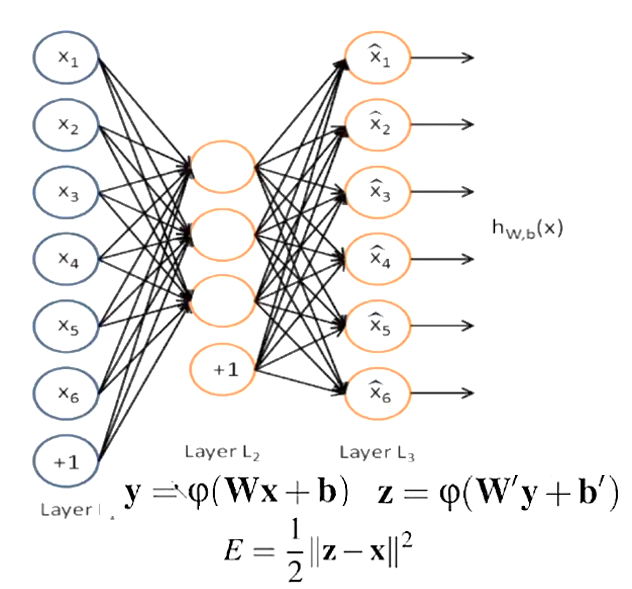

### **Answer:**

**Vanilla Autoencoder:**
- **Architecture:** Consists of a **single** encoder-decoder pair with one or more hidden layers.
- **Training:** Trained end-to-end to minimize the difference between input and reconstructed output.
- **Limitation:** May struggle to capture complex data representations due to its straightforward structure.

**Stacked Autoencoder:**
- **Architecture:** Comprises **multiple** autoencoders stacked sequentially, where each layer's output serves as the input for the next.
- **Training:** Employs a layer-wise pretraining approach:
  1. Train the first autoencoder on the raw input data.
  2. Use the encoded output from the first as input to train the second autoencoder.
  3. Continue this process for subsequent layers.
  4. After pretraining, fine-tune the entire network through backpropagation.
- **Advantage:** Captures hierarchical and complex features more effectively, leading to improved performance in tasks like classification and feature extraction.

#### **Benefits of Stacked Autoencoders**

- **Enhanced Feature Learning:** By capturing hierarchical features, stacked autoencoders can model intricate data patterns more effectively than vanilla autoencoders.
- **Improved Performance:** The layer-wise training approach often results in better initialization, leading to faster convergence and superior results in downstream tasks.



In [26]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np

# Load MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the images (28x28 -> 784)
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Bottleneck layer
bottleneck_layer = Dense(32, activation='relu', name='bottleneck')(input_layer)

# Output layer
output_layer = Dense(x_train.shape[1], activation='sigmoid', name='output')(bottleneck_layer)

# Build the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
autoencoder.summary()

# Train the autoencoder
history = autoencoder.fit(
    x_train,
    x_train,  # Input and target are the same
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test)
)

# Evaluate reconstruction performance
reconstructed_data = autoencoder.predict(x_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(x_test, reconstructed_data)
print("Reconstruction Mean Squared Error:", mse)

# Save the model
autoencoder.save('mnist_autoencoder.h5')
print("Model saved as 'mnist_autoencoder.h5'")

Model: "functional_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │        25,872 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,992 (199.19 KB)

 Trainable params: 50,992 (199.19 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1083 - val_loss: 0.0413
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0381 - val_loss: 0.0293
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0279 - val_loss: 0.0231
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0225 - val_loss: 0.0193
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0190 - val_loss: 0.0167
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0166 - val_loss: 0.0149
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0149 - val_loss: 0.0135
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0136 - val_loss: 0.0125
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0126 - val_loss: 0.0117
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0119 - val_loss: 0.0112
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

Reconstruction Mean Squared Error: 0.009935569
Model saved as 'mnist_autoencoder.h5'


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


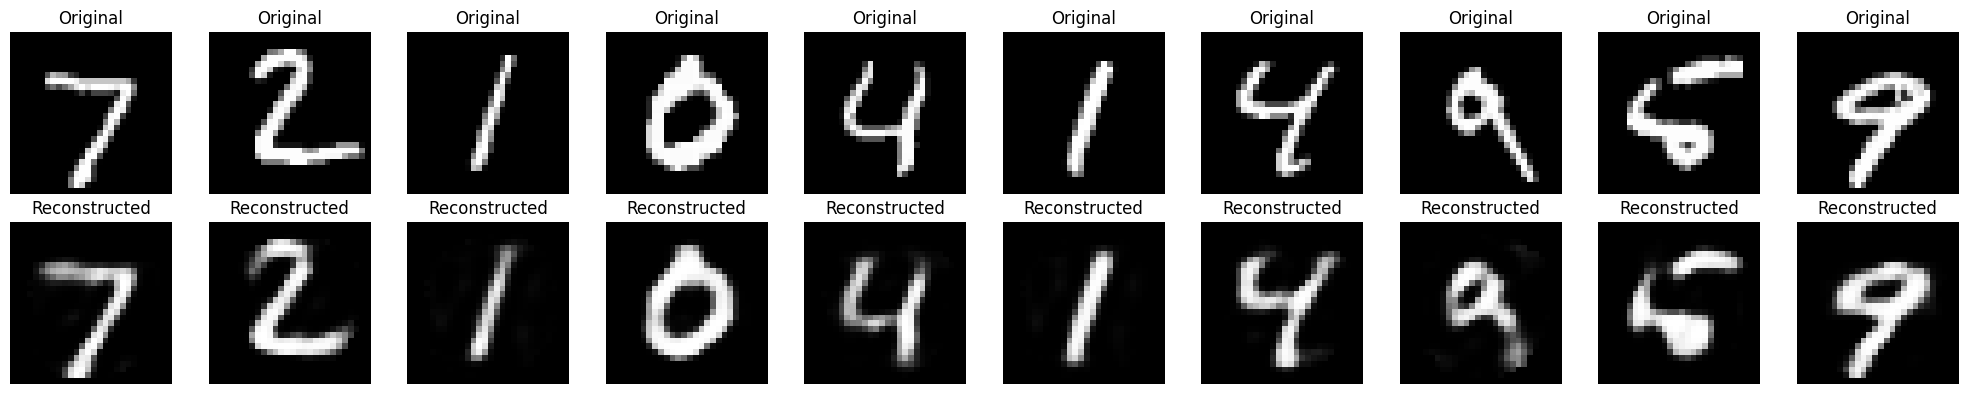

In [27]:
import matplotlib.pyplot as plt

# Function to plot original and reconstructed images
def plot_original_and_reconstructed(original, reconstructed, n=10):
    """
    Plots the original and reconstructed images side by side.
    :param original: Original images (numpy array).
    :param reconstructed: Reconstructed images (numpy array).
    :param n: Number of images to display.
    """
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Original")

        # Reconstructed images
        plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()

# Predict reconstructed images
reconstructed_data = autoencoder.predict(x_test)

# Plot the results
plot_original_and_reconstructed(x_test, reconstructed_data)


Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_19 (InputLayer)     │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_53 (Dense)                │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_54 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bottleneck (Dense)              │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_55 (Dense)                │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_56 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 784)            │       101,136 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.0988 - val_loss: 0.0392
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0356 - val_loss: 0.0271
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0263 - val_loss: 0.0230
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0226 - val_loss: 0.0205
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0203 - val_loss: 0.0186
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0188 - val_loss: 0.0174
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0176 - val_loss: 0.0165
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0165 - val_loss: 0.0156
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0157 - val_loss: 0.0151
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0152 - val_loss: 0.0146
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0146 - val_loss: 0.0140
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step

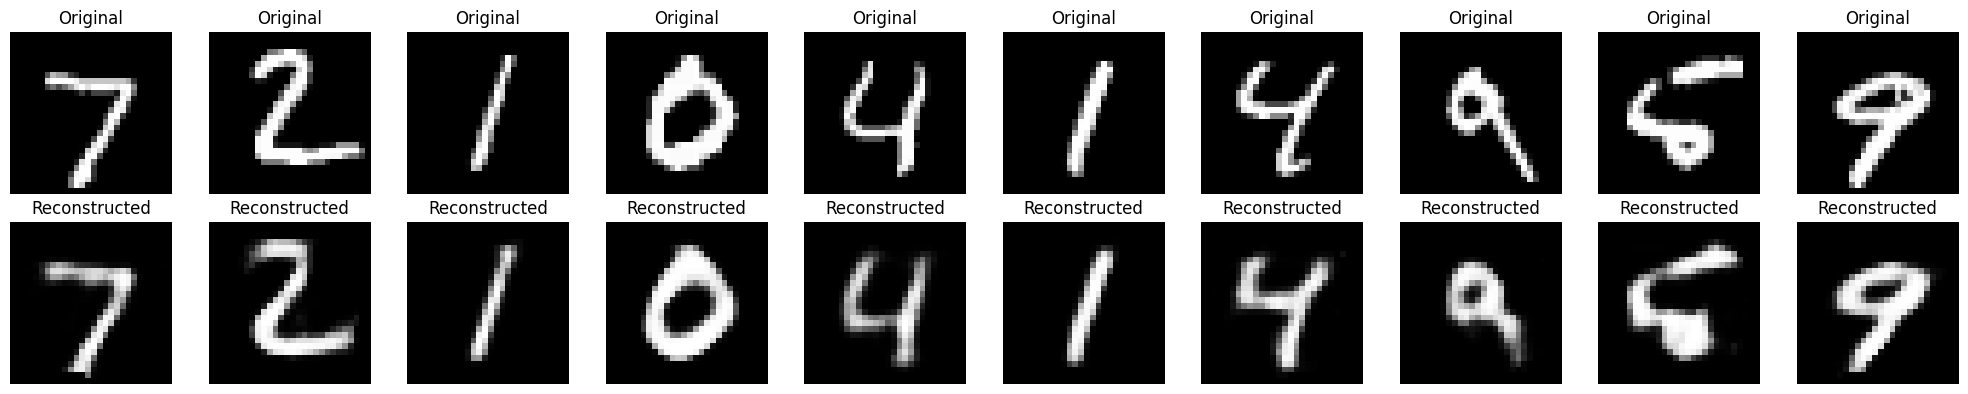

In [28]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np

# Load and preprocess MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((x_train.shape[0], -1))  # Flatten images
x_test = x_test.reshape((x_test.shape[0], -1))

# Input layer
input_layer = Input(shape=(x_train.shape[1],))

# Encoder: Stacked layers
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
bottleneck_layer = Dense(32, activation='relu', name='bottleneck')(encoder_layer2)

# Decoder: Stacked layers
decoder_layer1 = Dense(64, activation='relu')(bottleneck_layer)
decoder_layer2 = Dense(128, activation='relu')(decoder_layer1)
output_layer = Dense(x_train.shape[1], activation='sigmoid', name='output')(decoder_layer2)

# Build the stacked autoencoder model
stacked_autoencoder = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
stacked_autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Summary
stacked_autoencoder.summary()

# Train the model
stacked_autoencoder.fit(
    x_train,
    x_train,
    epochs=20,
    batch_size=256,
    validation_data=(x_test, x_test)
)

# Visualize results
import matplotlib.pyplot as plt

def plot_original_and_reconstructed(original, reconstructed, n=10):
    """
    Plots the original and reconstructed images side by side.
    :param original: Original images (numpy array).
    :param reconstructed: Reconstructed images (numpy array).
    :param n: Number of images to display.
    """
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original images
        plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Original")

        # Reconstructed images
        plt.subplot(2, n, n + i + 1)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.axis('off')
        plt.title("Reconstructed")

    plt.tight_layout()
    plt.show()

# Predict reconstructed images
reconstructed_data = stacked_autoencoder.predict(x_test)

# Plot the results
plot_original_and_reconstructed(x_test, reconstructed_data)


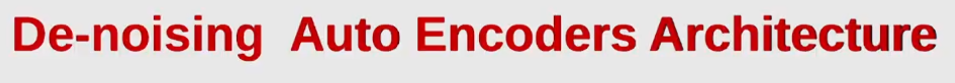

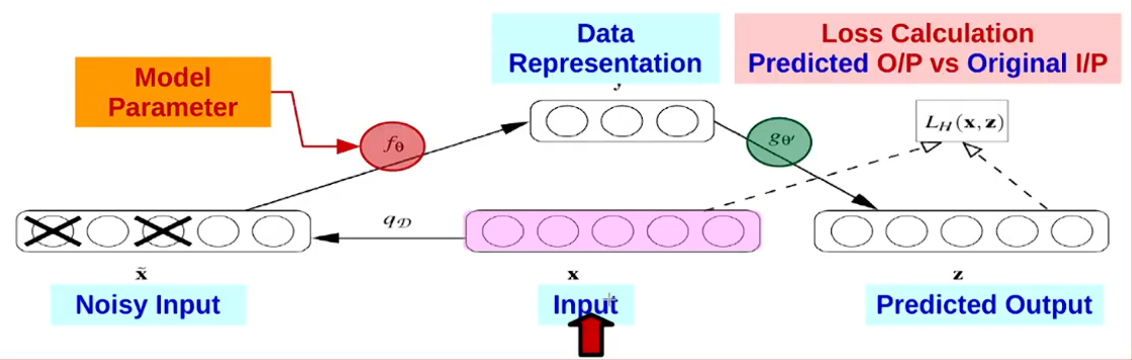

### **Q12:** for code below **Denoising Autoencoder** with 4 layer encoder and 4 layer decoder.Redesign it again with 6 layer encoder and 6 layer decoder add your design image here and what the benefit for using Bottleneck with 2 nodes after rebuild your answers kindly  prove your answer by any visual proven 

your image will Provide a detailed explanation of your choices for the encoder and decoder layers, activation functions, and other hyperparameters. Justify how your design should lead to good performance and what kind of results you expect.

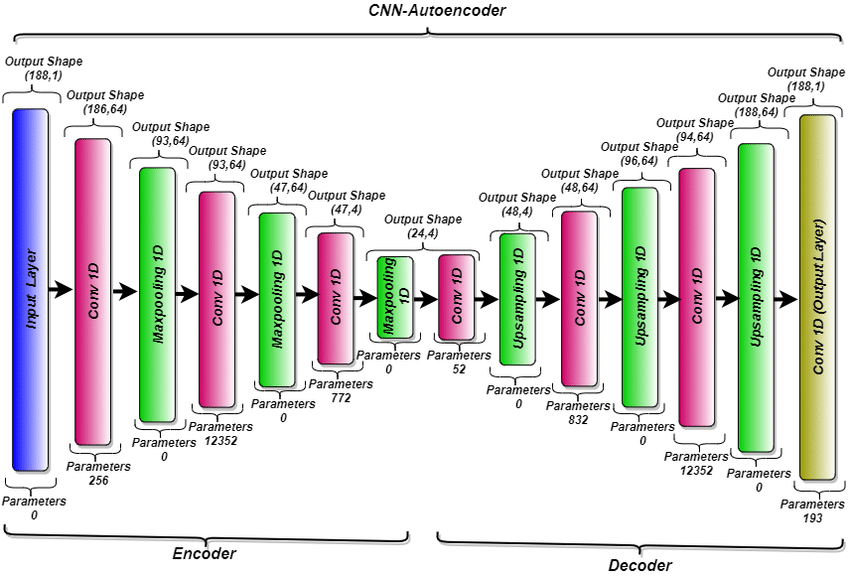

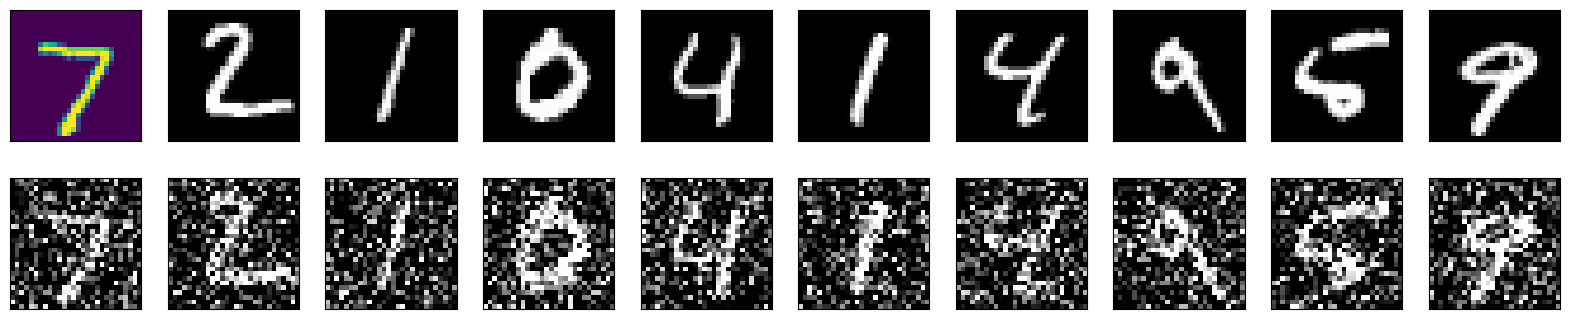

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0651
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0524
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0489
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0467
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0456
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


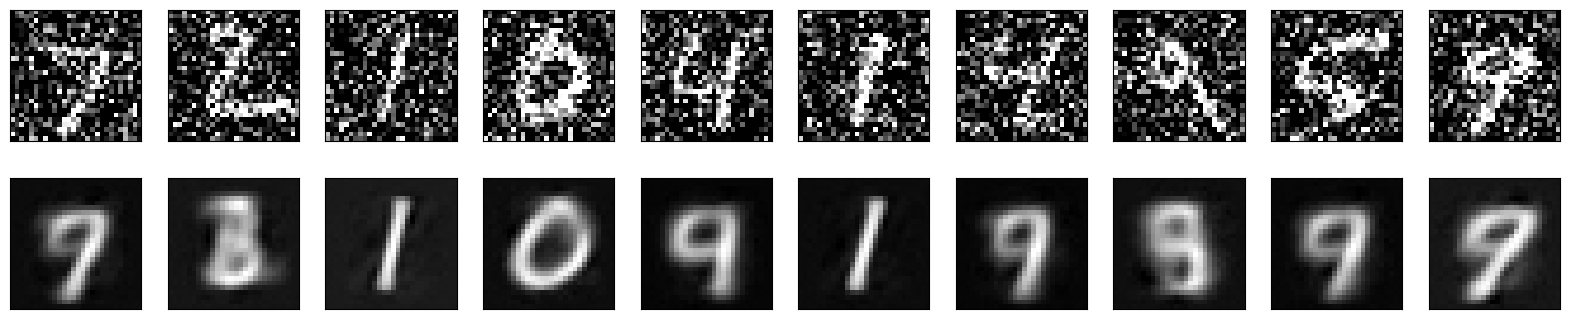

In [29]:


import numpy as np

from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.

ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 128
ENCODING_DIM_LAYER2 = 64
ENCODING_DIM_LAYER3 = 10
ENCODING_DIM_OUTPUT = 2
EPOCHS = 5
BATCH_SIZE = 64
NOISE_FACTOR = 0.5

def train(x_train_noisy, x_train):

    # input placeholder
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer
    encode_layer1 = Dense(ENCODING_DIM_LAYER1, activation='relu')(input_image)
    encode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(encode_layer1)
    encode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_layer2)
    encode_output = Dense(ENCODING_DIM_OUTPUT)(encode_layer3)

    # decoding layer
    decode_layer1 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_output)
    decode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(decode_layer1)
    decode_layer3 = Dense(ENCODING_DIM_LAYER1, activation='relu')(decode_layer2)
    decode_output = Dense(ENCODING_DIM_INPUT, activation='tanh')(decode_layer3)

    # build autoencoder, encoder
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=encode_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train_noisy, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def add_noise(x_train, x_test):
    """
    add noise.
    :return:
    """
    x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)     # limit into [0, 1]
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)   # limit into [0, 1]

    return x_train_noisy, x_test_noisy


def show_images(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4: add noisy
    x_train_noisy, x_test_noisy = add_noise(x_train, x_test)
    # show the contrast before noising and after noising.
    show_images(x_test_noisy, x_test)

    # Step5： train
    encoder,autoencoder = train(x_train_noisy=x_train_noisy, x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test_noisy)
    # plot_representation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test_noisy)
    show_images(decode_images, x_test_noisy)

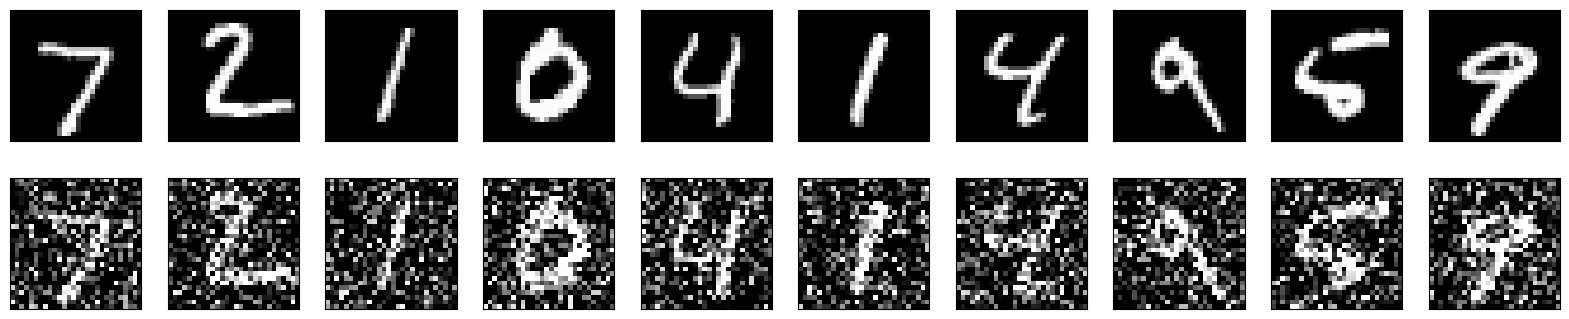

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0646
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0512
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0471
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0453
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0445
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


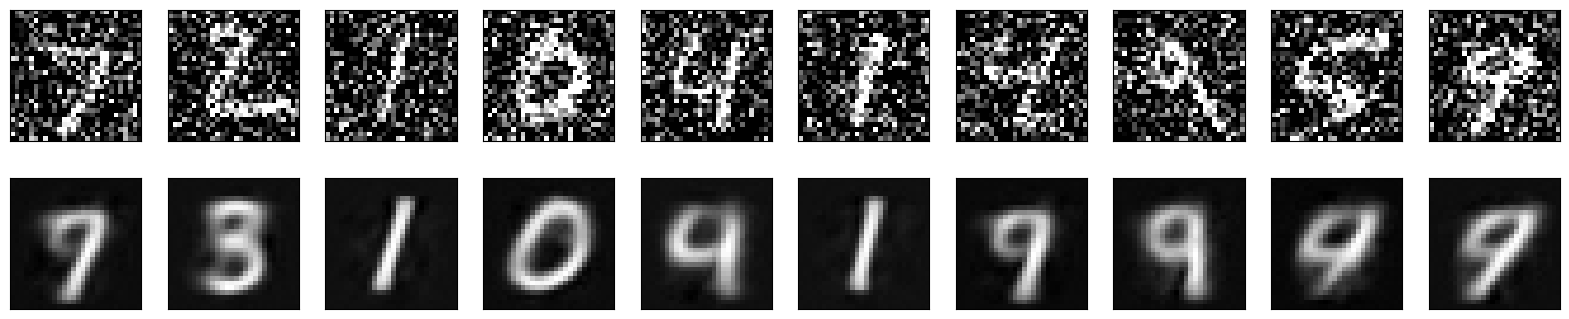

In [31]:
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
import matplotlib.pyplot as plt

np.random.seed(33)   # random seed，to reproduce results.

ENCODING_DIM_INPUT = 784
ENCODING_DIM_LAYER1 = 128
ENCODING_DIM_LAYER2 = 64
ENCODING_DIM_LAYER3 = 64
ENCODING_DIM_LAYER4 = 64
ENCODING_DIM_LAYER5 = 10
ENCODING_DIM_OUTPUT = 2
EPOCHS = 5
BATCH_SIZE = 64
NOISE_FACTOR = 0.5

def train(x_train_noisy, x_train):

    # input placeholder
    input_image = Input(shape=(ENCODING_DIM_INPUT, ))

    # encoding layer
    encode_layer1 = Dense(ENCODING_DIM_LAYER1, activation='relu')(input_image)
    encode_layer2 = Dense(ENCODING_DIM_LAYER2, activation='relu')(encode_layer1)
    encode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(encode_layer2)
    encode_layer4 = Dense(ENCODING_DIM_LAYER4, activation='relu')(encode_layer3)
    encode_layer5 = Dense(ENCODING_DIM_LAYER4, activation='relu')(encode_layer4)
    encode_output = Dense(ENCODING_DIM_OUTPUT)(encode_layer5)

    # decoding layer
    decode_layer1 = Dense(ENCODING_DIM_LAYER5, activation='relu')(encode_output)
    decode_layer2 = Dense(ENCODING_DIM_LAYER4, activation='relu')(decode_layer1)
    decode_layer3 = Dense(ENCODING_DIM_LAYER3, activation='relu')(decode_layer2)
    decode_layer4 = Dense(ENCODING_DIM_LAYER2, activation='relu')(decode_layer3)
    decode_layer5 = Dense(ENCODING_DIM_LAYER1, activation='relu')(decode_layer4)
    decode_output = Dense(ENCODING_DIM_INPUT, activation='tanh')(decode_layer5)

    # build autoencoder, encoder
    autoencoder = Model(inputs=input_image, outputs=decode_output)
    encoder = Model(inputs=input_image, outputs=encode_output)

    # compile autoencoder
    autoencoder.compile(optimizer='adam', loss='mse')

    # training
    autoencoder.fit(x_train_noisy, x_train, epochs=EPOCHS, batch_size=BATCH_SIZE, shuffle=True)

    return encoder, autoencoder

def add_noise(x_train, x_test):
    """
    add noise.
    :return:
    """
    x_train_noisy = x_train + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
    x_test_noisy = x_test + NOISE_FACTOR * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)     # limit into [0, 1]
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)   # limit into [0, 1]

    return x_train_noisy, x_test_noisy


def show_images(decode_images, x_test):
    """
    plot the images.
    :param decode_images: the images after decoding
    :param x_test: testing data
    :return:
    """
    n = 10
    plt.figure(figsize=(20, 4))
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        ax.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        ax = plt.subplot(2, n, i + 1 + n)
        ax.imshow(decode_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

if __name__ == '__main__':
    # Step1： load data  x_train: (60000, 28, 28), y_train: (60000,) x_test: (10000, 28, 28), y_test: (10000,)
    (x_train, y_train), (x_test, y_test) = mnist.load_data()

    # Step2: normalize
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.

    # Step3: reshape data, x_train: (60000, 784), x_test: (10000, 784), one row denotes one sample.
    x_train = x_train.reshape((x_train.shape[0], -1))
    x_test = x_test.reshape((x_test.shape[0], -1))

    # Step4: add noisy
    x_train_noisy, x_test_noisy = add_noise(x_train, x_test)
    # show the contrast before noising and after noising.
    show_images(x_test_noisy, x_test)

    # Step5： train
    encoder,autoencoder = train(x_train_noisy=x_train_noisy, x_train=x_train)

    # test and plot
    encode_images = encoder.predict(x_test_noisy)
    # plot_representation(encode_images, y_test)

    # show images
    decode_images = autoencoder.predict(x_test_noisy)
    show_images(decode_images, x_test_noisy)